In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv(r"C:\Users\krunal sheth\Downloads\penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.shape

(344, 7)

In [4]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [8]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [9]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [12]:
df['island'] = df['island'].map({'Torgersen':0,'Biscoe':1,'Dream':2})

In [13]:
df['island'].unique()

array([0, 1, 2], dtype=int64)

In [14]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [15]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,1,44.5,15.7,217.0,4875.0,.


In [16]:
df[df['species'] == 'Gentoo'].groupby('sex').describe()

island                                    culmen_length_mm             \
        count mean  std  min  25%  50%  75%  max            count       mean   
sex                                                                            
.         1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0              1.0  44.500000   
FEMALE   58.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0             58.0  45.563793   
MALE     61.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0             61.0  49.473770   

        ... flipper_length_mm        body_mass_g                           \
        ...               75%    max       count         mean         std   
sex     ...                                                                 
.       ...             217.0  217.0         1.0  4875.000000         NaN   
FEMALE  ...             215.0  222.0        58.0  4679.741379  281.578294   
MALE    ...             225.0  231.0        61.0  5484.836066  313.158596   

                                                
           min     25%     50%     75%     max  
sex                                             
.       4875.0  4875.0  4875.0  4875.0  4875.0  
FEMALE  3950.0  4462.5  4700.0  4875.0  5200.0  
MALE    4750.0  5300.0  5500.0  5700.0  6300.0  

[3 rows x 40 columns]

In [17]:
df[df['species'] == 'Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
island            count     1.0    58.000000    61.000000
                  mean      1.0     1.000000     1.000000
                  std       NaN     0.000000     0.000000
                  min       1.0     1.000000     1.000000
                  25%       1.0     1.000000     1.000000
                  50%       1.0     1.000000     1.000000
                  75%       1.0     1.000000     1.000000
                  max       1.0     1.000000     1.000000
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [18]:
df.at[336,'sex']= 'FEMALE'

In [19]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

# data visulization

<function matplotlib.pyplot.show(close=None, block=None)>

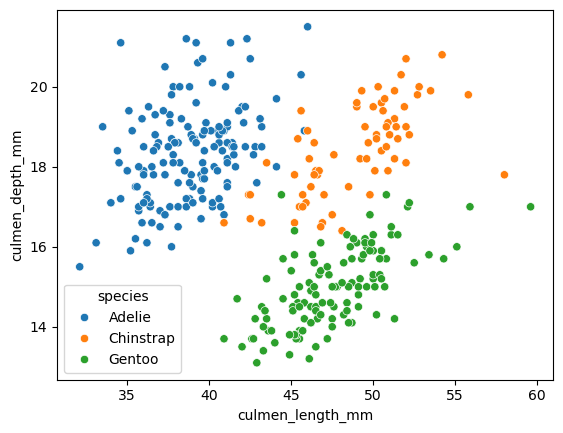

In [20]:
sns.scatterplot(x = 'culmen_length_mm',y = 'culmen_depth_mm',data = df, hue = 'species')
plt.show

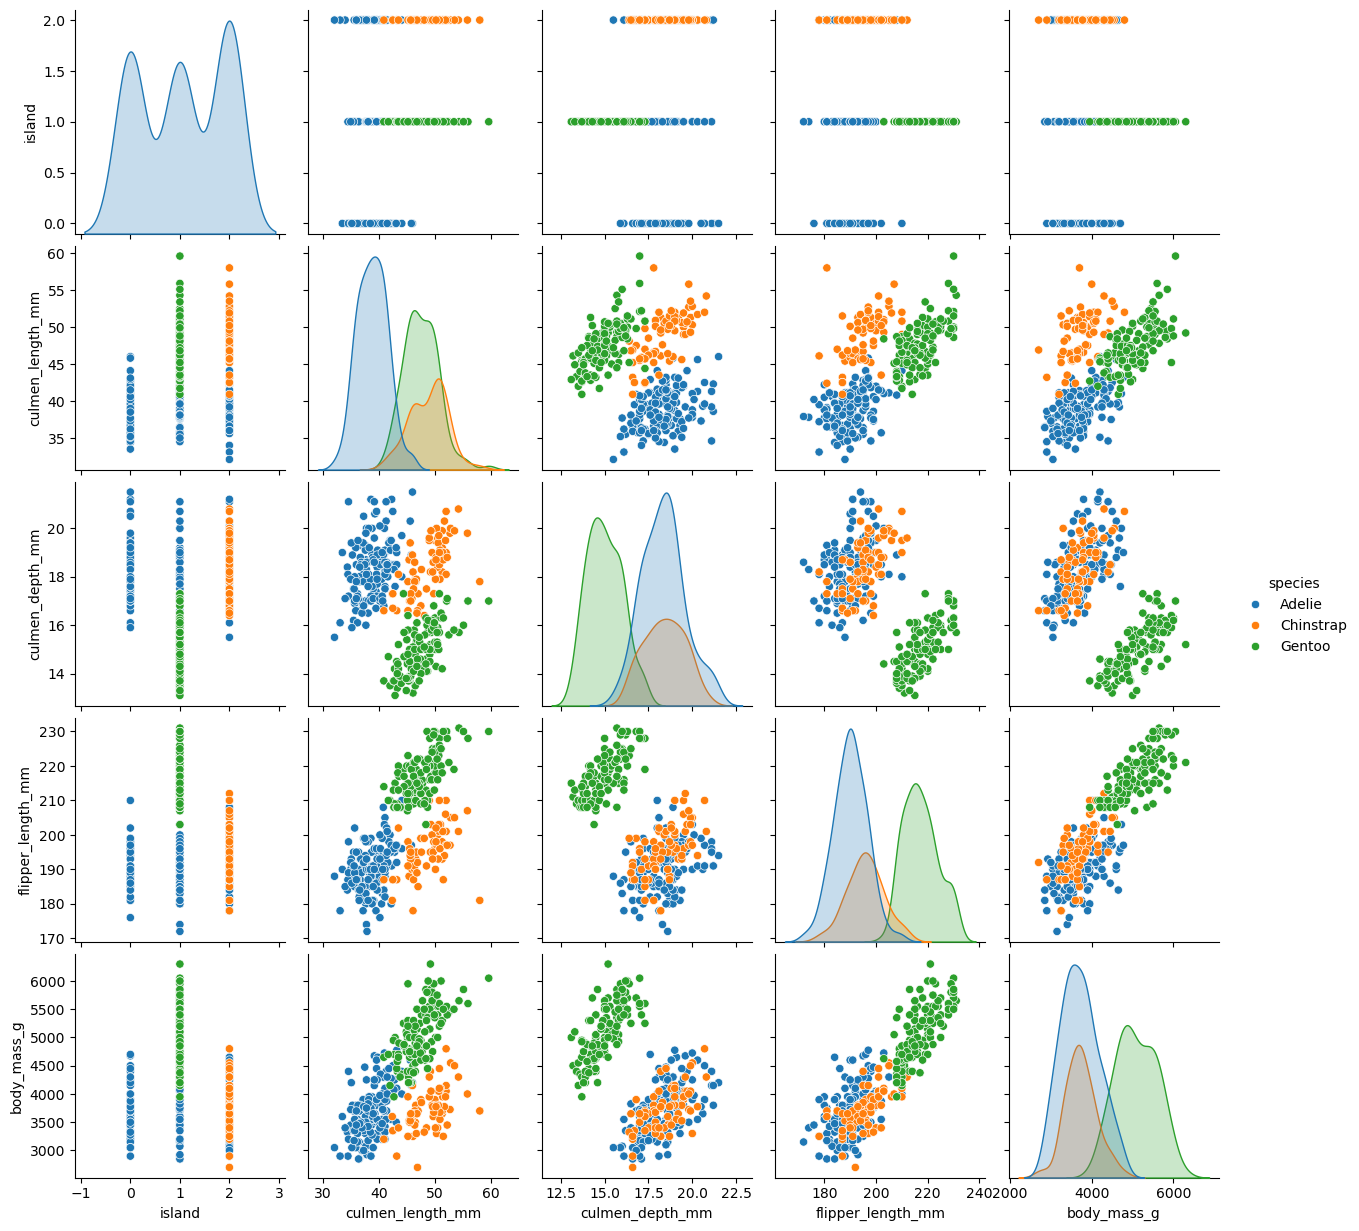

In [21]:
sns.pairplot( df, hue = 'species')
plt.show()

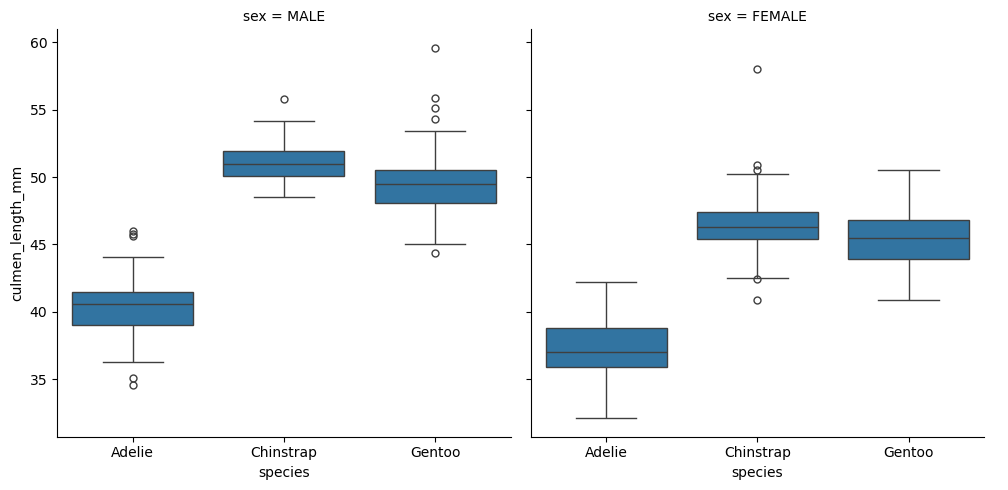

In [22]:
sns.catplot(x = 'species', y = 'culmen_length_mm',col = 'sex', data = df, kind = 'box')
plt.show()

In [23]:
df['sex'] = df['sex'].map({'FEMALE': 0, 'MALE': 1})

In [24]:
df['sex']

0      1
1      0
2      0
4      0
5      1
      ..
338    0
340    0
341    1
342    0
343    1
Name: sex, Length: 334, dtype: int64

In [25]:
y = df['species']
x = df.iloc[:,1:]

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
forest = RandomForestClassifier(n_estimators = 10,max_features = 'sqrt', random_state = 101)

In [31]:
forest.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

# prediction

In [32]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,0,39.1,18.7,181.0,3750.0,1
1,Adelie,0,39.5,17.4,186.0,3800.0,0
2,Adelie,0,40.3,18.0,195.0,3250.0,0
4,Adelie,0,36.7,19.3,193.0,3450.0,0
5,Adelie,0,39.3,20.6,190.0,3650.0,1


In [33]:
forest.predict([[0,36.7,19.3,193.0,3450.0,0]])

C:\Users\krunal sheth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Adelie'], dtype=object)

In [35]:
forest.score(x_train,y_train)

1.0

In [36]:
forest.score(x_test,y_test)

0.9801980198019802

# confusion matrix

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

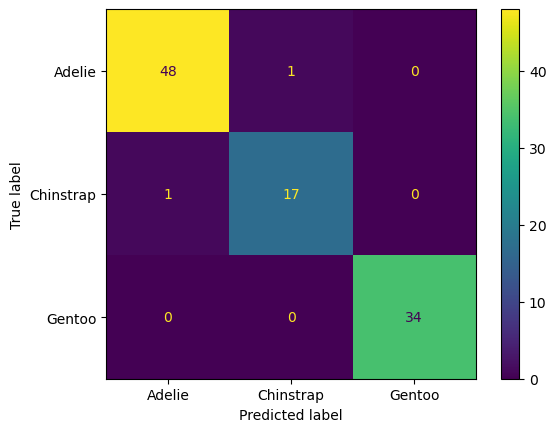

In [38]:
ConfusionMatrixDisplay.from_estimator(forest, x_test, y_test)

In [39]:
y_pred = forest.predict(x_test)
y_pred

array(['Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Ge

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        49
   Chinstrap       0.94      0.94      0.94        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.98       101
   macro avg       0.97      0.97      0.97       101
weighted avg       0.98      0.98      0.98       101



In [44]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [45]:
def plot_multiclass_roc(clf, x_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.predict_proba(x_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="lower right",fontsize=8)
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

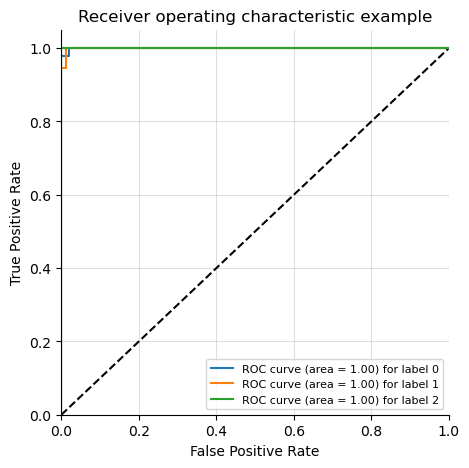

In [46]:
plot_multiclass_roc(forest, x_test, y_test, n_classes = 3)